In [16]:
import Pkg
Pkg.activate("../AR")

  Activating project at `c:\Users\goninarn\Desktop\Stage\AR`


In [17]:
include("../AR/utils/utils.jl")
include("../AR/utils/Structure.jl")
include("table_reader.jl")
include("Prev2.jl")
include("PhenoPred.jl")
include("PhenoPlot.jl")
cd(@__DIR__)
commonpath = "../mystations/"
DRIASpath = "../DRIAS/"

"../DRIAS/"

TN temperatures and dates

In [18]:
df = extract_series_DRIAS(DRIASpath * "T_Nantes4.txt")
TN_temp_Nantes4 = initTN(df)

TN(34698×2 DataFrame
   Row │ DATE        TN      
       │ Date        Float64 
───────┼─────────────────────
     1 │ 2006-01-01    -1.7
     2 │ 2006-01-02     1.99
     3 │ 2006-01-03     8.41
     4 │ 2006-01-04     7.95
     5 │ 2006-01-05     5.57
     6 │ 2006-01-06     6.54
     7 │ 2006-01-07     8.21
     8 │ 2006-01-08     6.79
   ⋮   │     ⋮          ⋮
 34692 │ 2100-12-25     5.63
 34693 │ 2100-12-26     6.61
 34694 │ 2100-12-27     7.15
 34695 │ 2100-12-28     4.61
 34696 │ 2100-12-29     3.35
 34697 │ 2100-12-30     6.53
 34698 │ 2100-12-31     3.98
           34683 rows omitted)

## Apple phenology model

Endodormancy break date :
$n_{db} = Inf \{ D, \sum_{d = CPO}^D R_c(\theta_d) > C \} $  
Budburst date :
$n_{bb} = Inf \{ D, \sum_{d = n_{db}}^D R_f(\theta_d) > H \} $  
$C$, $H$ : Chilling and heating quantity required  
$\theta_d$ : Temperature (TG) at day d  

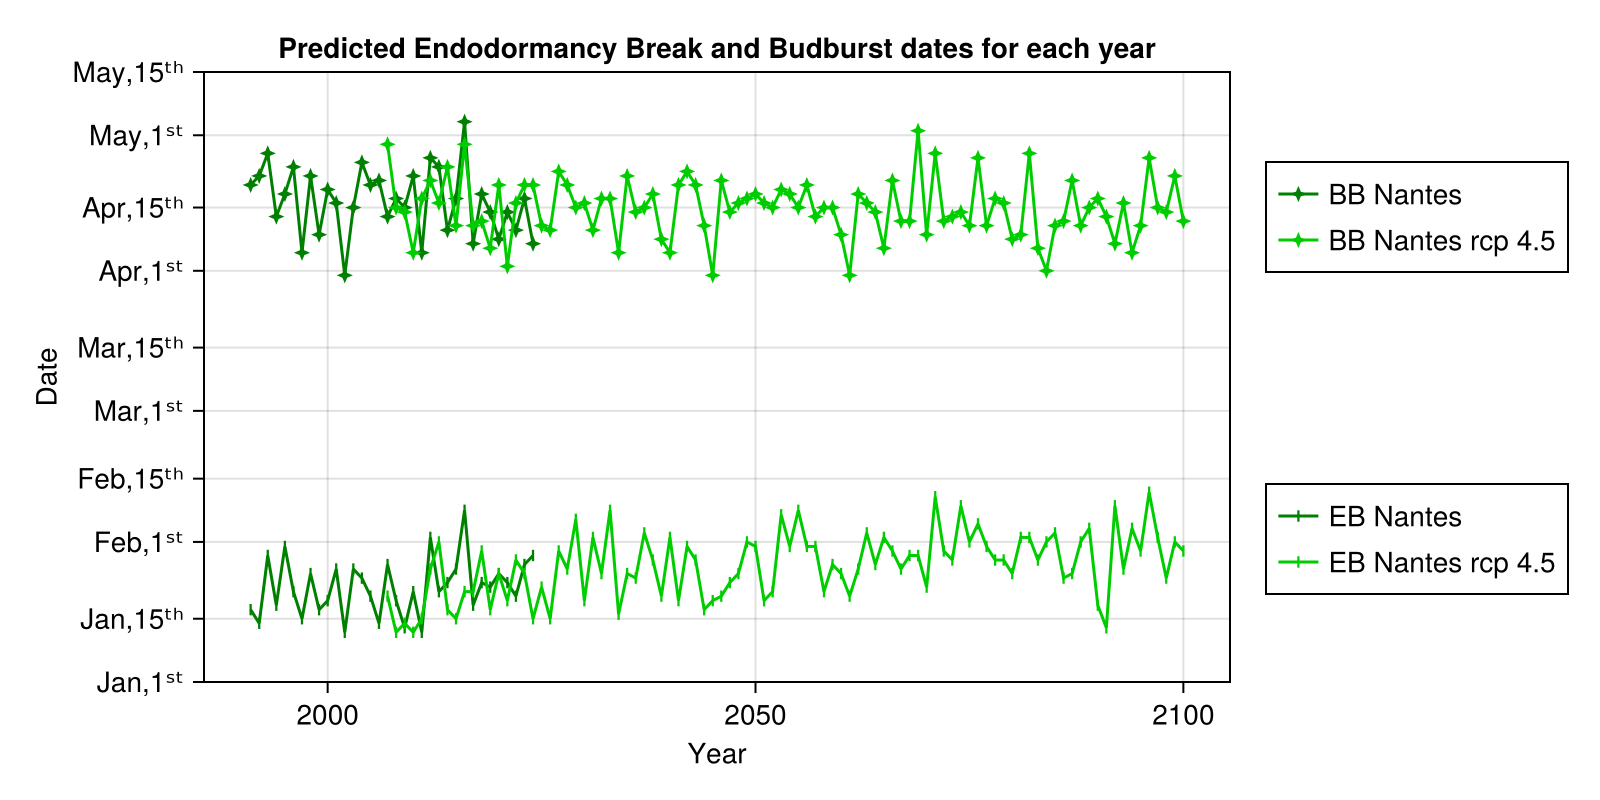

CairoMakie.Screen{IMAGE}


In [19]:
DB_Nantes, BB_Nantes = Apple_Phenology_Pred(initTG(commonpath * "TG_Nantes.txt"))
DB_Nantes4, BB_Nantes4 = Apple_Phenology_Pred(initTG(df))


date_vecsBB = [BB_Nantes,BB_Nantes4]

colors = ["green", "green3"]

fig = Plot_Pheno_Dates_DB_BB([DB_Nantes, DB_Nantes4],
    date_vecsBB,
    (10, 30),
    DB_label=["EB Nantes","EB Nantes rcp 4.5"],
    BB_label=["BB Nantes","BB Nantes rcp 4.5"],
    DB_colors=colors,
    BB_colors=colors
)
save("Presentation/Apple_Nantes4.pdf", fig, ; px_per_unit=2.0)
display(fig)


# include("PhenoPlot.jl")
# fig = Plot_Freeze_Risk_Bar(TN_temp_Nantes4, BB_Nantes4,
#     color="orange",
#     label="Bonn")

# display(fig)
# save("Presentation/Freeze_Risk.pdf", fig, ; px_per_unit=2.0)

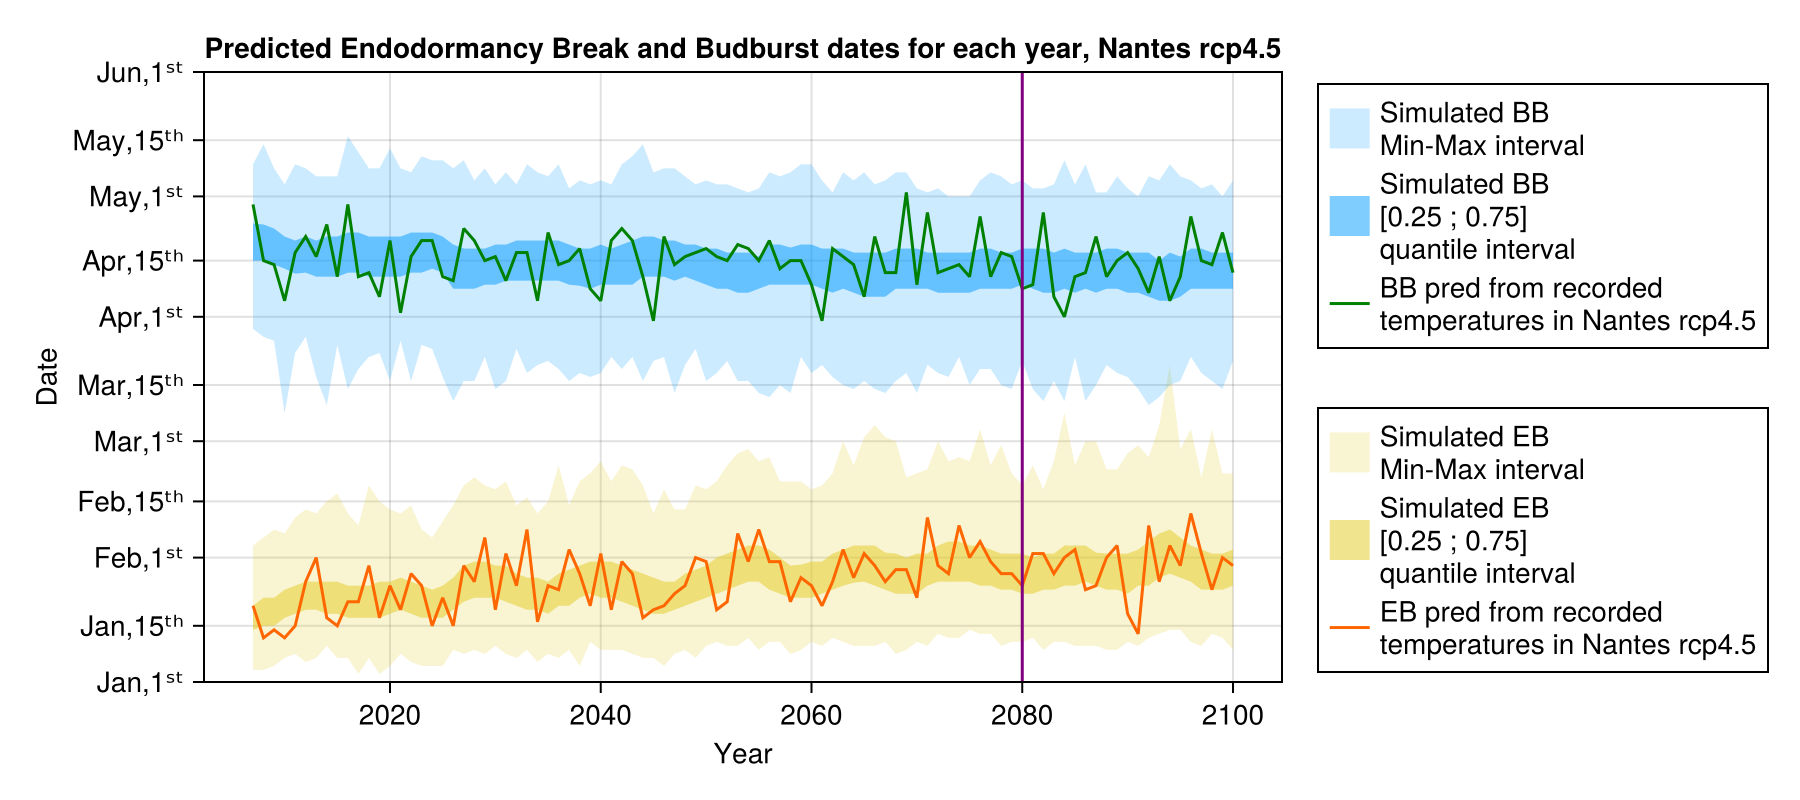

CairoMakie.Screen{PDF}


In [20]:
date_vec, x = df.DATE, Matrix(df[:, Cols("TN", "TG")])

ARmodel = load_model("modelNantes4TN_TG_p3_k2.jld2")
x_vec = rand(ARmodel, 1000, date_vec)

Tab = [Apple_Phenology_Pred(view(x_hat, :, 2), date_vec) for x_hat in x_vec] |> stack
Set_DB = Tab[1, :]
Set_BB = Tab[2, :]

fig = Plot_Pheno_Dates_DB_BB(DB_Nantes4, BB_Nantes4, (10, 30),
    sample_DB=Set_DB,
    sample_BB=Set_BB,
    station_name="Nantes rcp4.5",
    YearCut=2080
)
display(fig)
save("Presentation/ANantes4_sim.pdf", fig; px_per_unit=2.0)

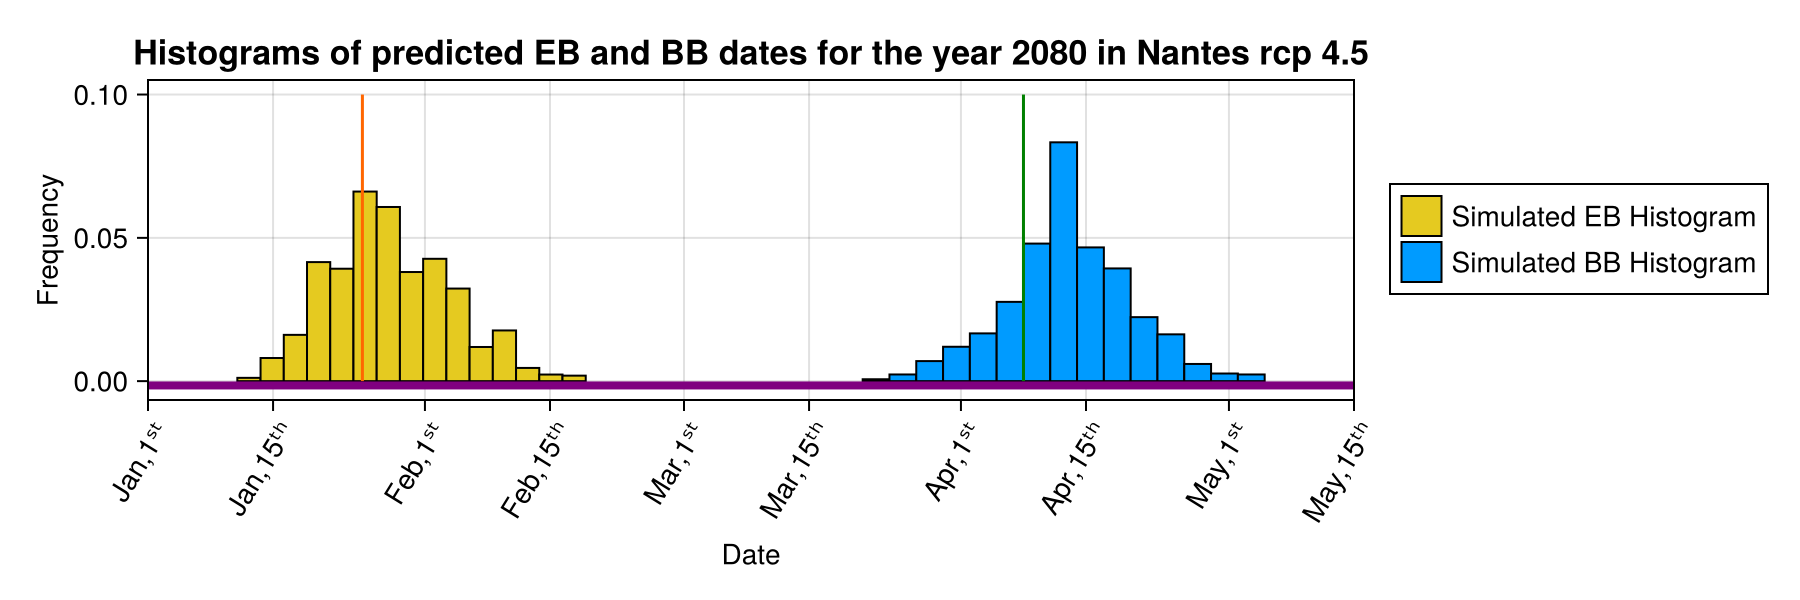

CairoMakie.Screen{PDF}


In [21]:
include("PhenoPlot.jl")
fig = PlotHistogram(DB_Nantes4, BB_Nantes4, (10, 30), 2080,
    sample_DB=Set_DB,
    sample_BB=Set_BB,
    station_name="Nantes rcp 4.5",
    LineHeight=0.1
)
display(fig)
save("Presentation/ANantes4_2080.pdf", fig, ; px_per_unit=2.0)

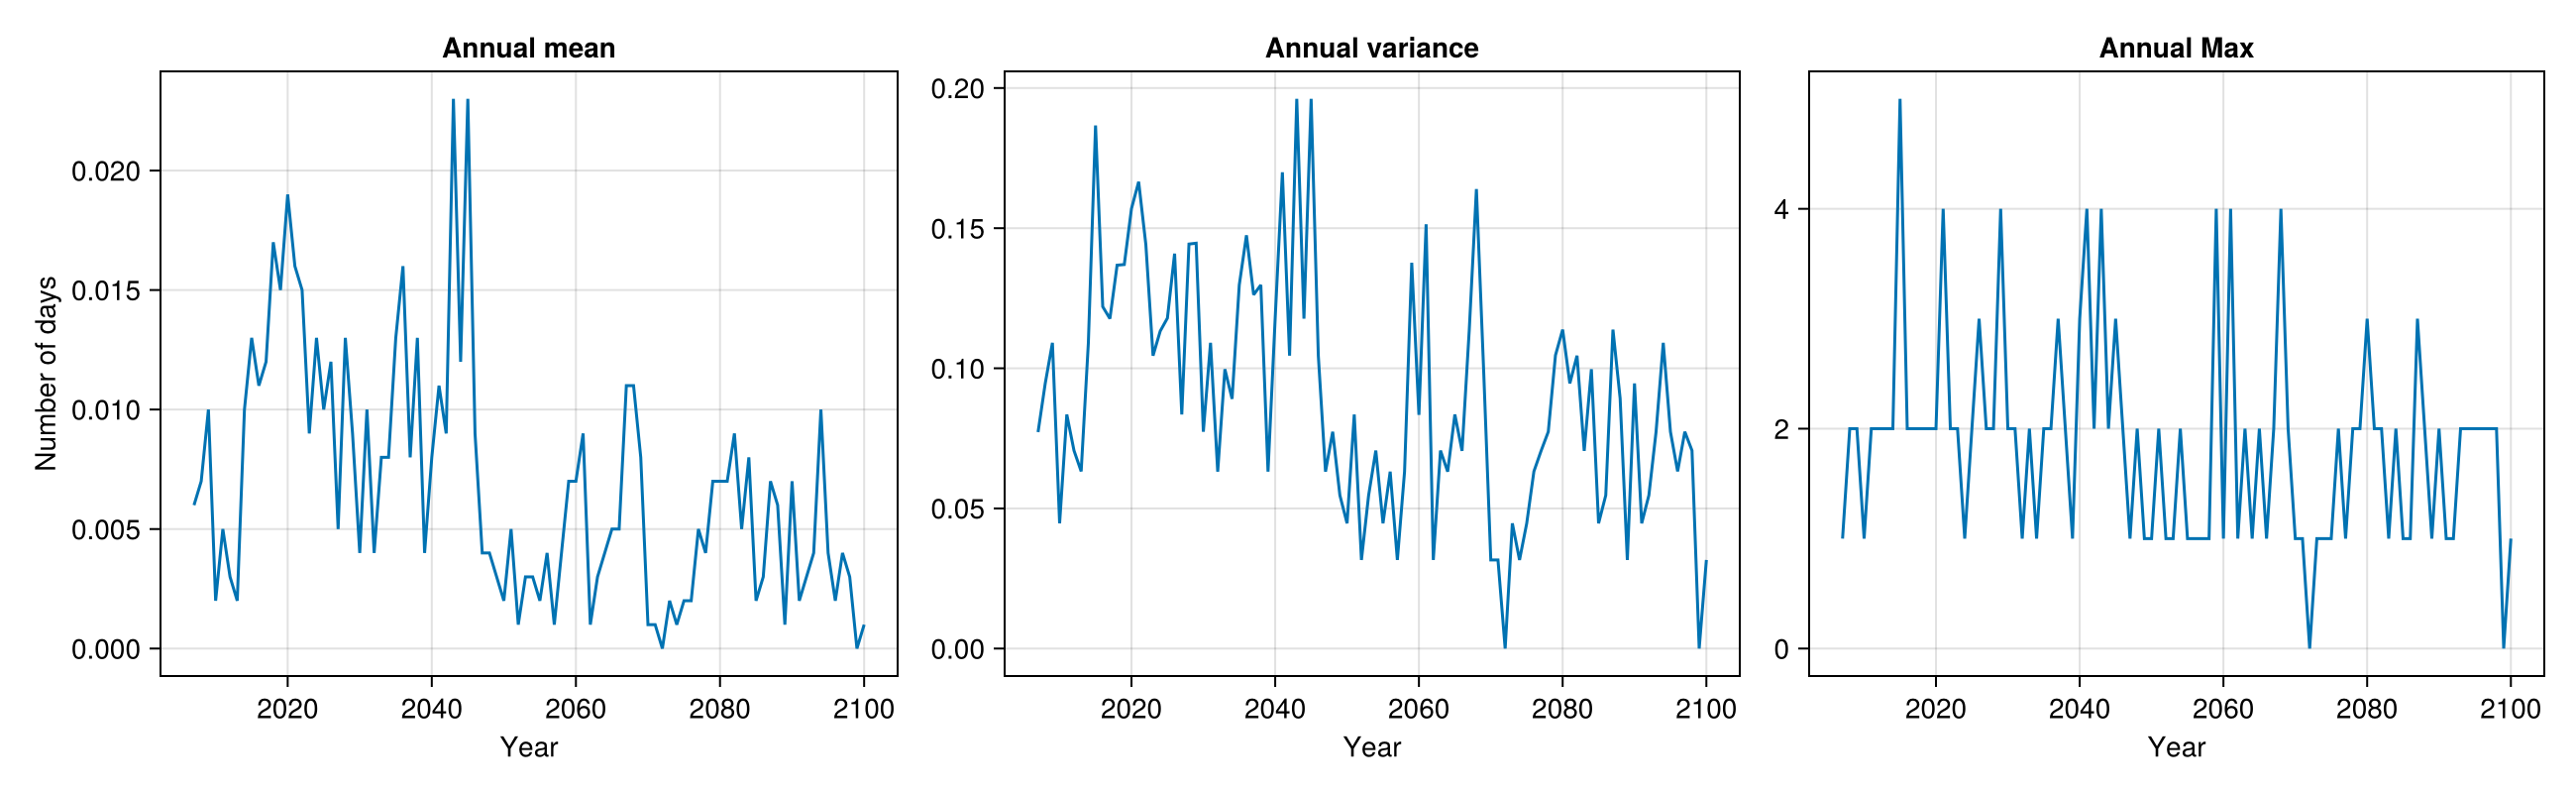

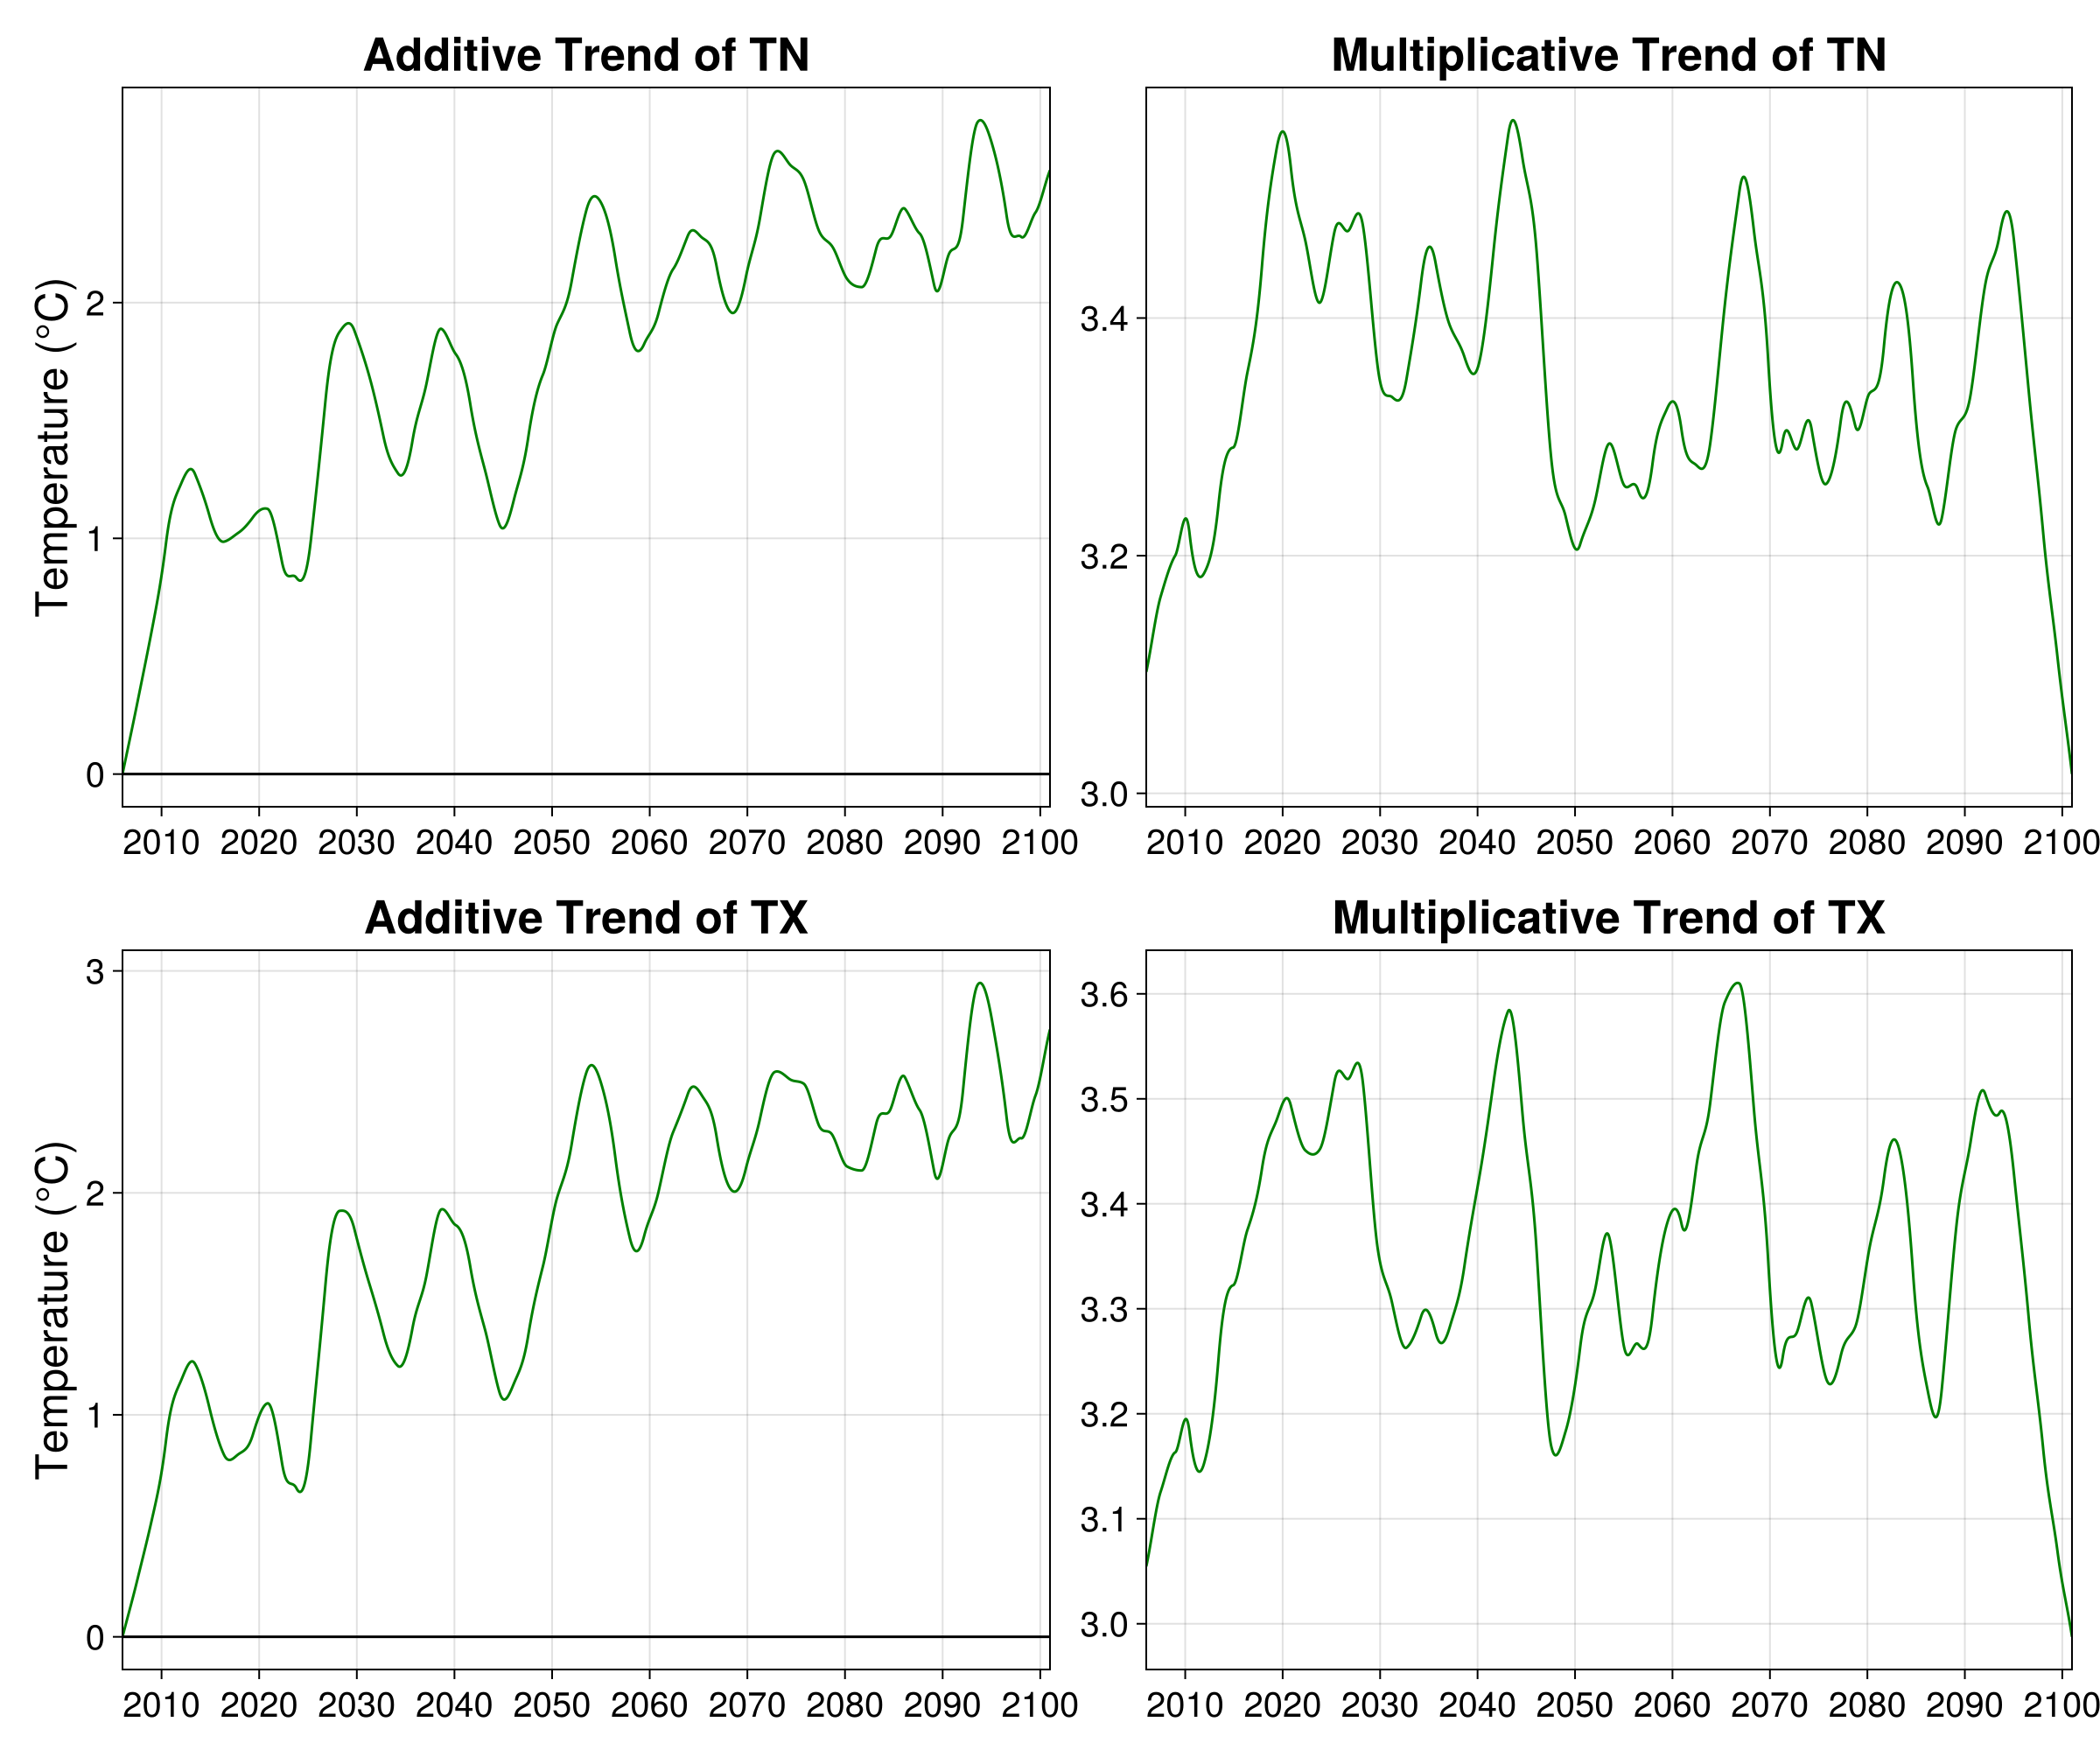

CairoMakie.Screen{IMAGE}


In [22]:
fig = Plot_Freeze_Risk_sample([view(x_hat,:,1) for x_hat in x_vec],date_vec,Set_BB)
display(fig)
save("Presentation/ANantes4_risk.pdf", fig ; px_per_unit=2.0)
display(PlotTrend(ARmodel))

## Vine phenology model

Endodormancy break date :
$n_{db} = Inf \{ D, \sum_{d = CPO}^D R_c(\theta_d) > Cc \} $  
Budbirst date :
$n_{bb} = Inf \{ D, \sum_{d = n_{db}}^D R_f(\theta_d) > Ghc \} $  
$Cc$, $Ghc$ : Chilling and heating quantity required  
$\theta_d$ : Temperature (TG) at day d  

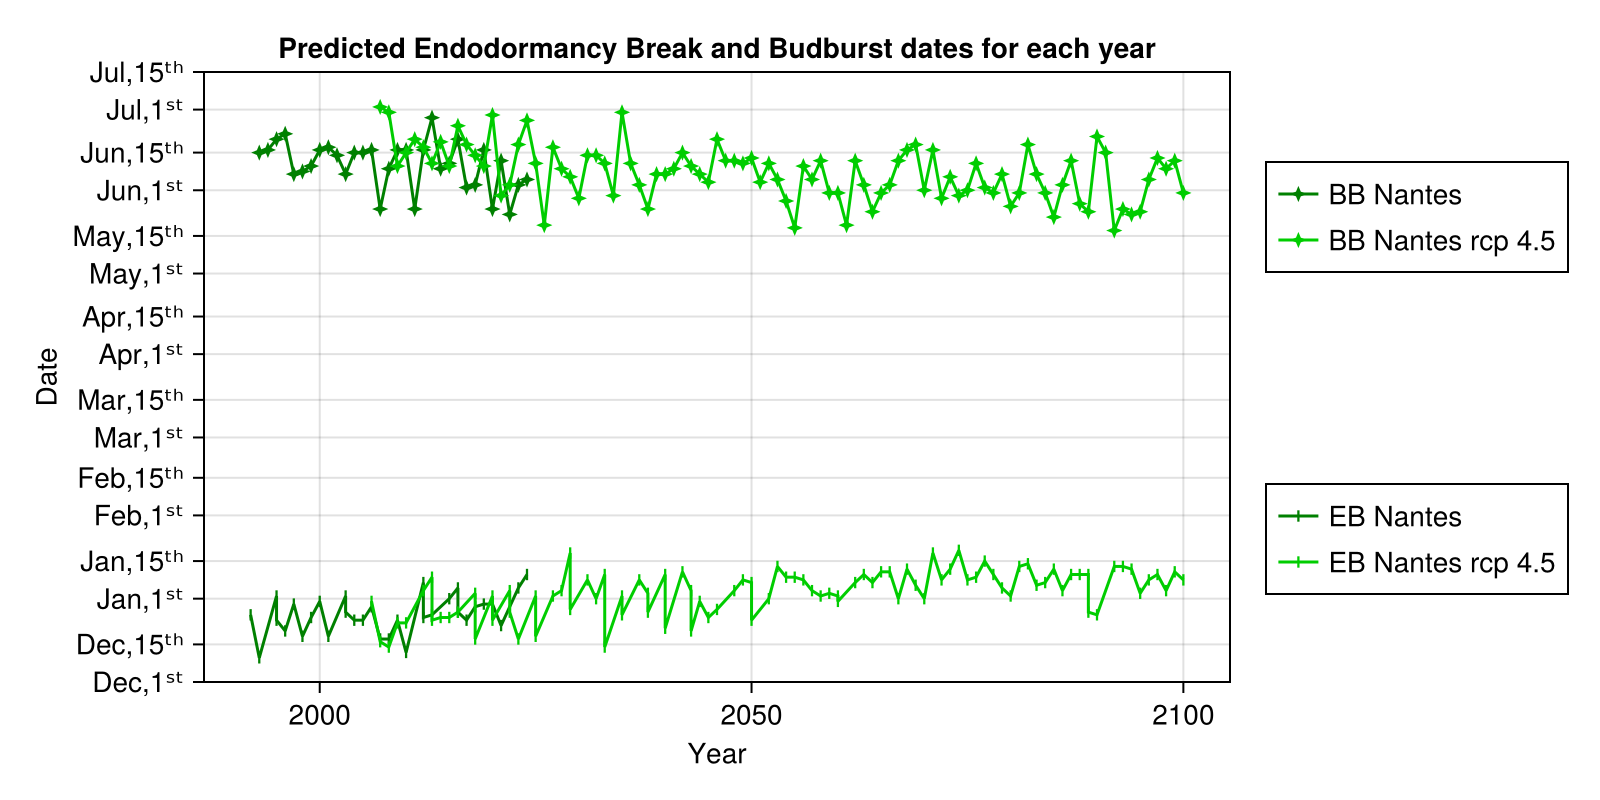

CairoMakie.Screen{IMAGE}


In [23]:
DB_Nantes, BB_Nantes = Vine_Phenology_Pred(commonpath * "TN_Nantes.txt", commonpath * "TX_Nantes.txt")
DB_Nantes4, BB_Nantes4 = Vine_Phenology_Pred(df.TN,df.TX,df.DATE)
# DB_Forli, BB_Forli = Vine_Phenology_Pred(commonpath * "TN_Forli.txt", commonpath * "TX_Forli.txt")

date_vecsBB = [BB_Nantes,BB_Nantes4]

colors = ["green", "green3"]

fig = Plot_Pheno_Dates_DB_BB([DB_Nantes, DB_Nantes4],
    date_vecsBB,
    (8, 1),
    DB_label=["EB Nantes","EB Nantes rcp 4.5"],
    BB_label=["BB Nantes","BB Nantes rcp 4.5"],
    DB_colors=colors,
    BB_colors=colors
)
save("Presentation/Gvine_Nantes4.pdf", fig, ; px_per_unit=2.0)
display(fig)

# date_vecsBB = [BB_Montpellier, BB_Bonn, BB_Nantes]
# label = ["Montpellier", "Bonn", "Nantes"]

# fig = Plot_Freeze_Risk(TN_vecs, dates_vecs_TN, date_vecsBB,
#     colors=colors,
#     label=label,
#     threshold=-0.5)

# display(fig)

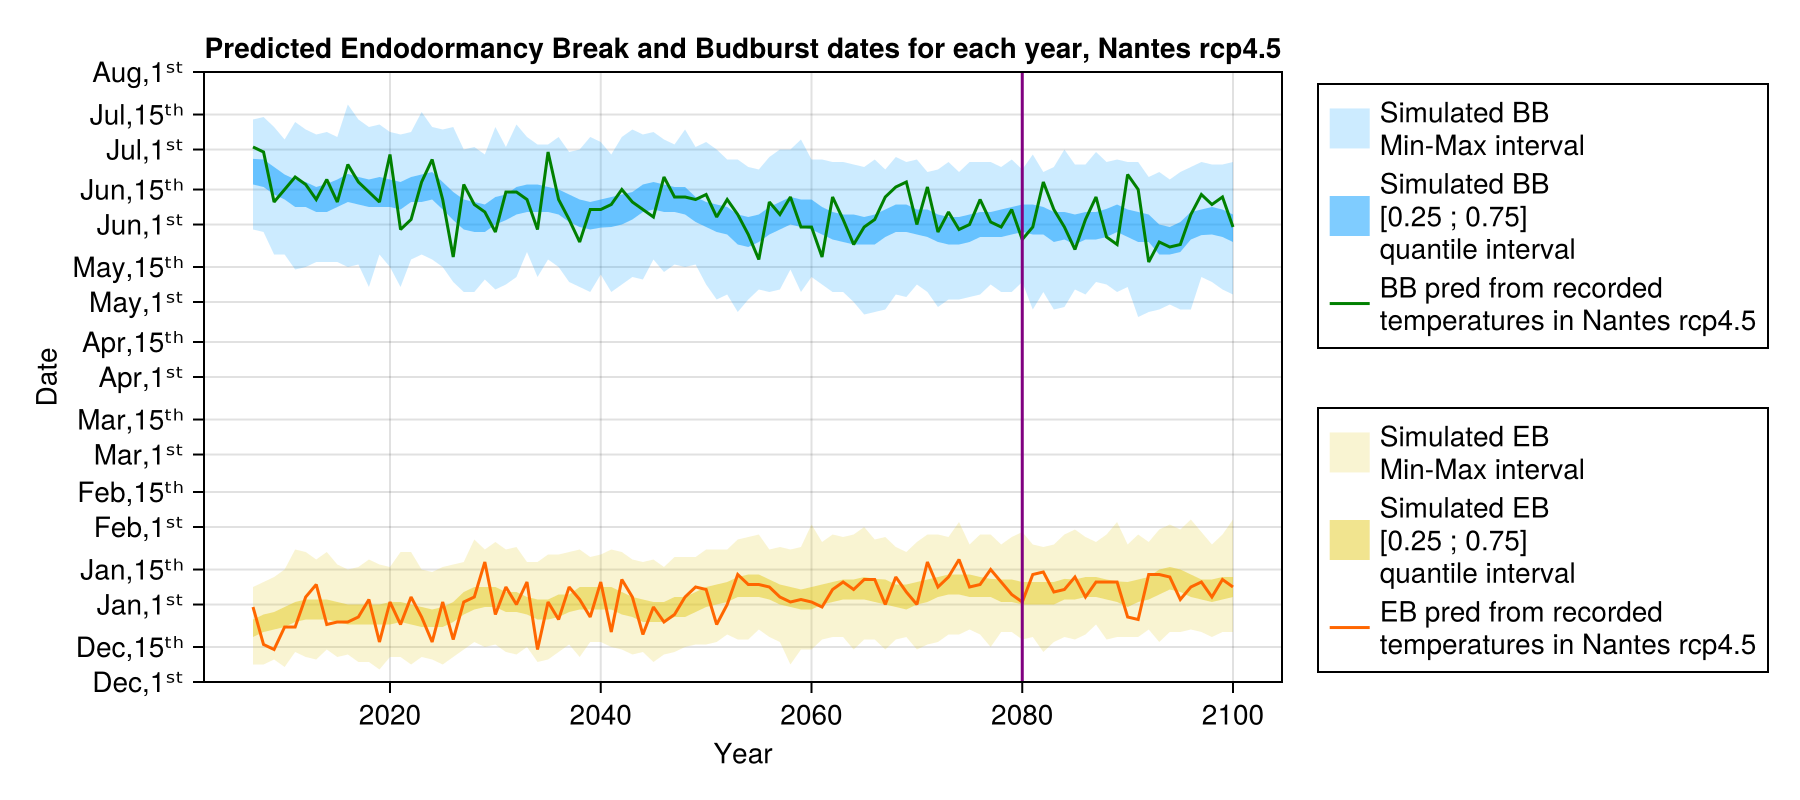

CairoMakie.Screen{PDF}


In [27]:
date_vec, x = df.DATE, Matrix(df[:, Cols("TN", "TX")])

ARmodel = load_model("modelNantes4TN_TX_p3_k2.jld2")
x_vec = rand(ARmodel, 1000, date_vec)

Tab = [Vine_Phenology_Pred(x_hat, date_vec) for x_hat in x_vec] |> stack
Set_DB = Tab[1, :]
Set_BB = Tab[2, :]

fig = Plot_Pheno_Dates_DB_BB(DB_Nantes4, BB_Nantes4, (10, 30),
    sample_DB=Set_DB,
    sample_BB=Set_BB,
    station_name="Nantes rcp4.5",
    YearCut=2080
)
display(fig)
save("Presentation/GNantes4_sim.pdf", fig; px_per_unit=2.0)

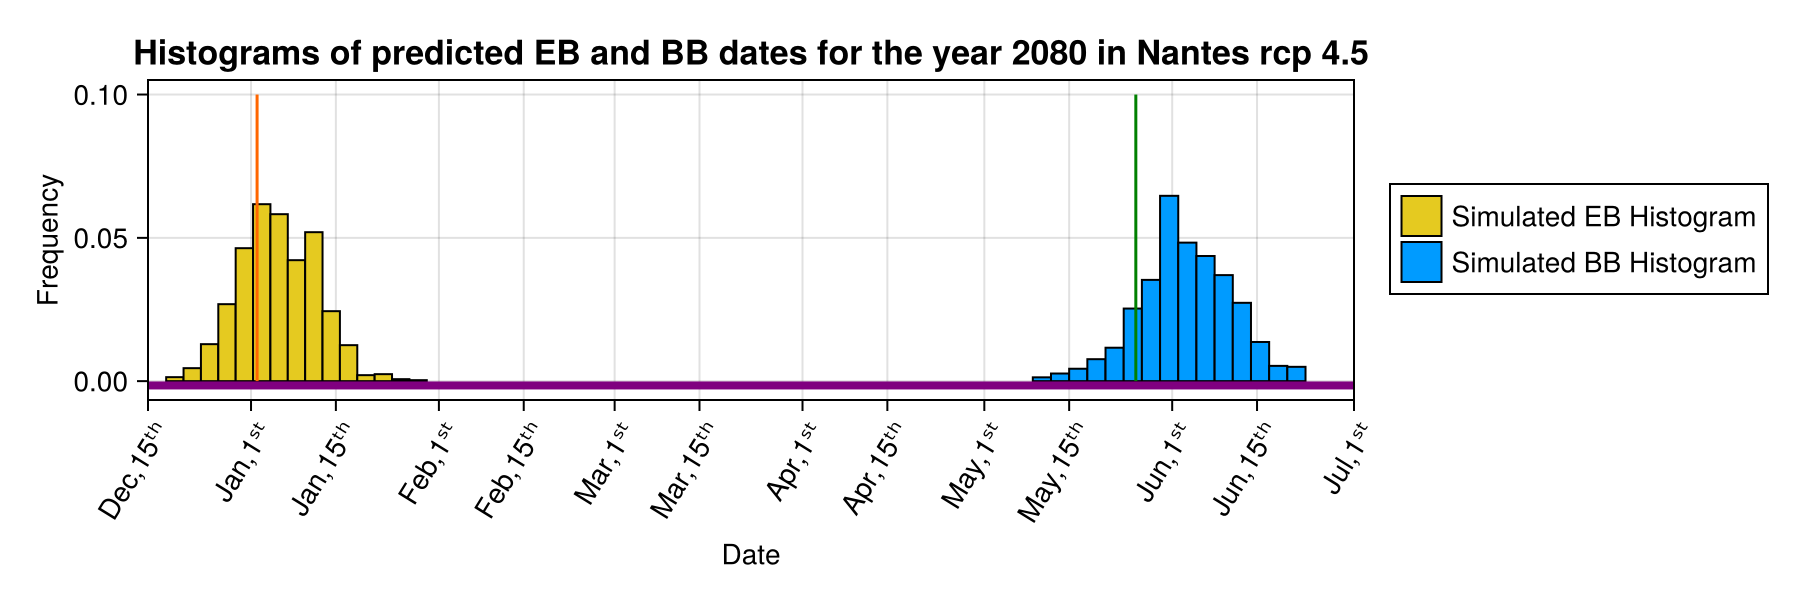

CairoMakie.Screen{PDF}


In [28]:
include("PhenoPlot.jl")
fig = PlotHistogram(DB_Nantes4, BB_Nantes4, (10, 30), 2080,
    sample_DB=Set_DB,
    sample_BB=Set_BB,
    station_name="Nantes rcp 4.5",
    LineHeight=0.1
)
display(fig)
save("Presentation/GNantes4_2080.pdf", fig, ; px_per_unit=2.0)

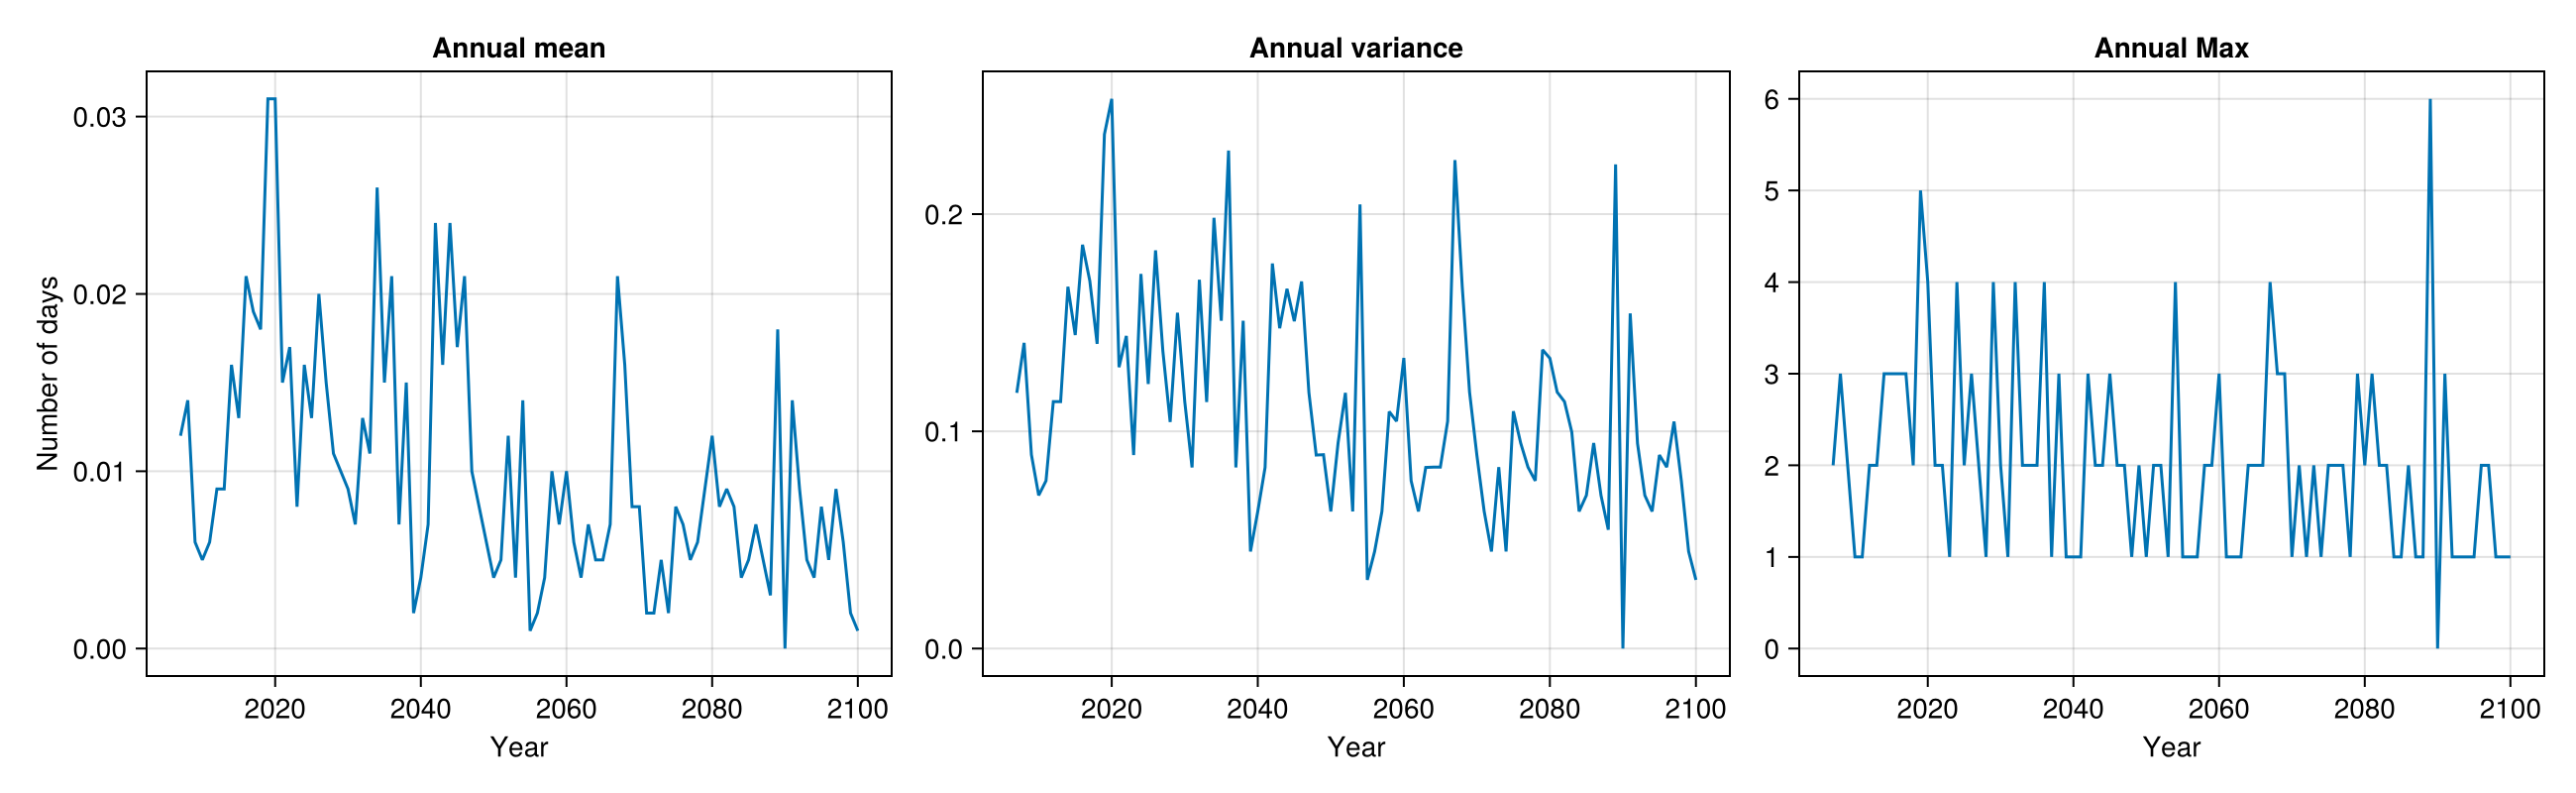

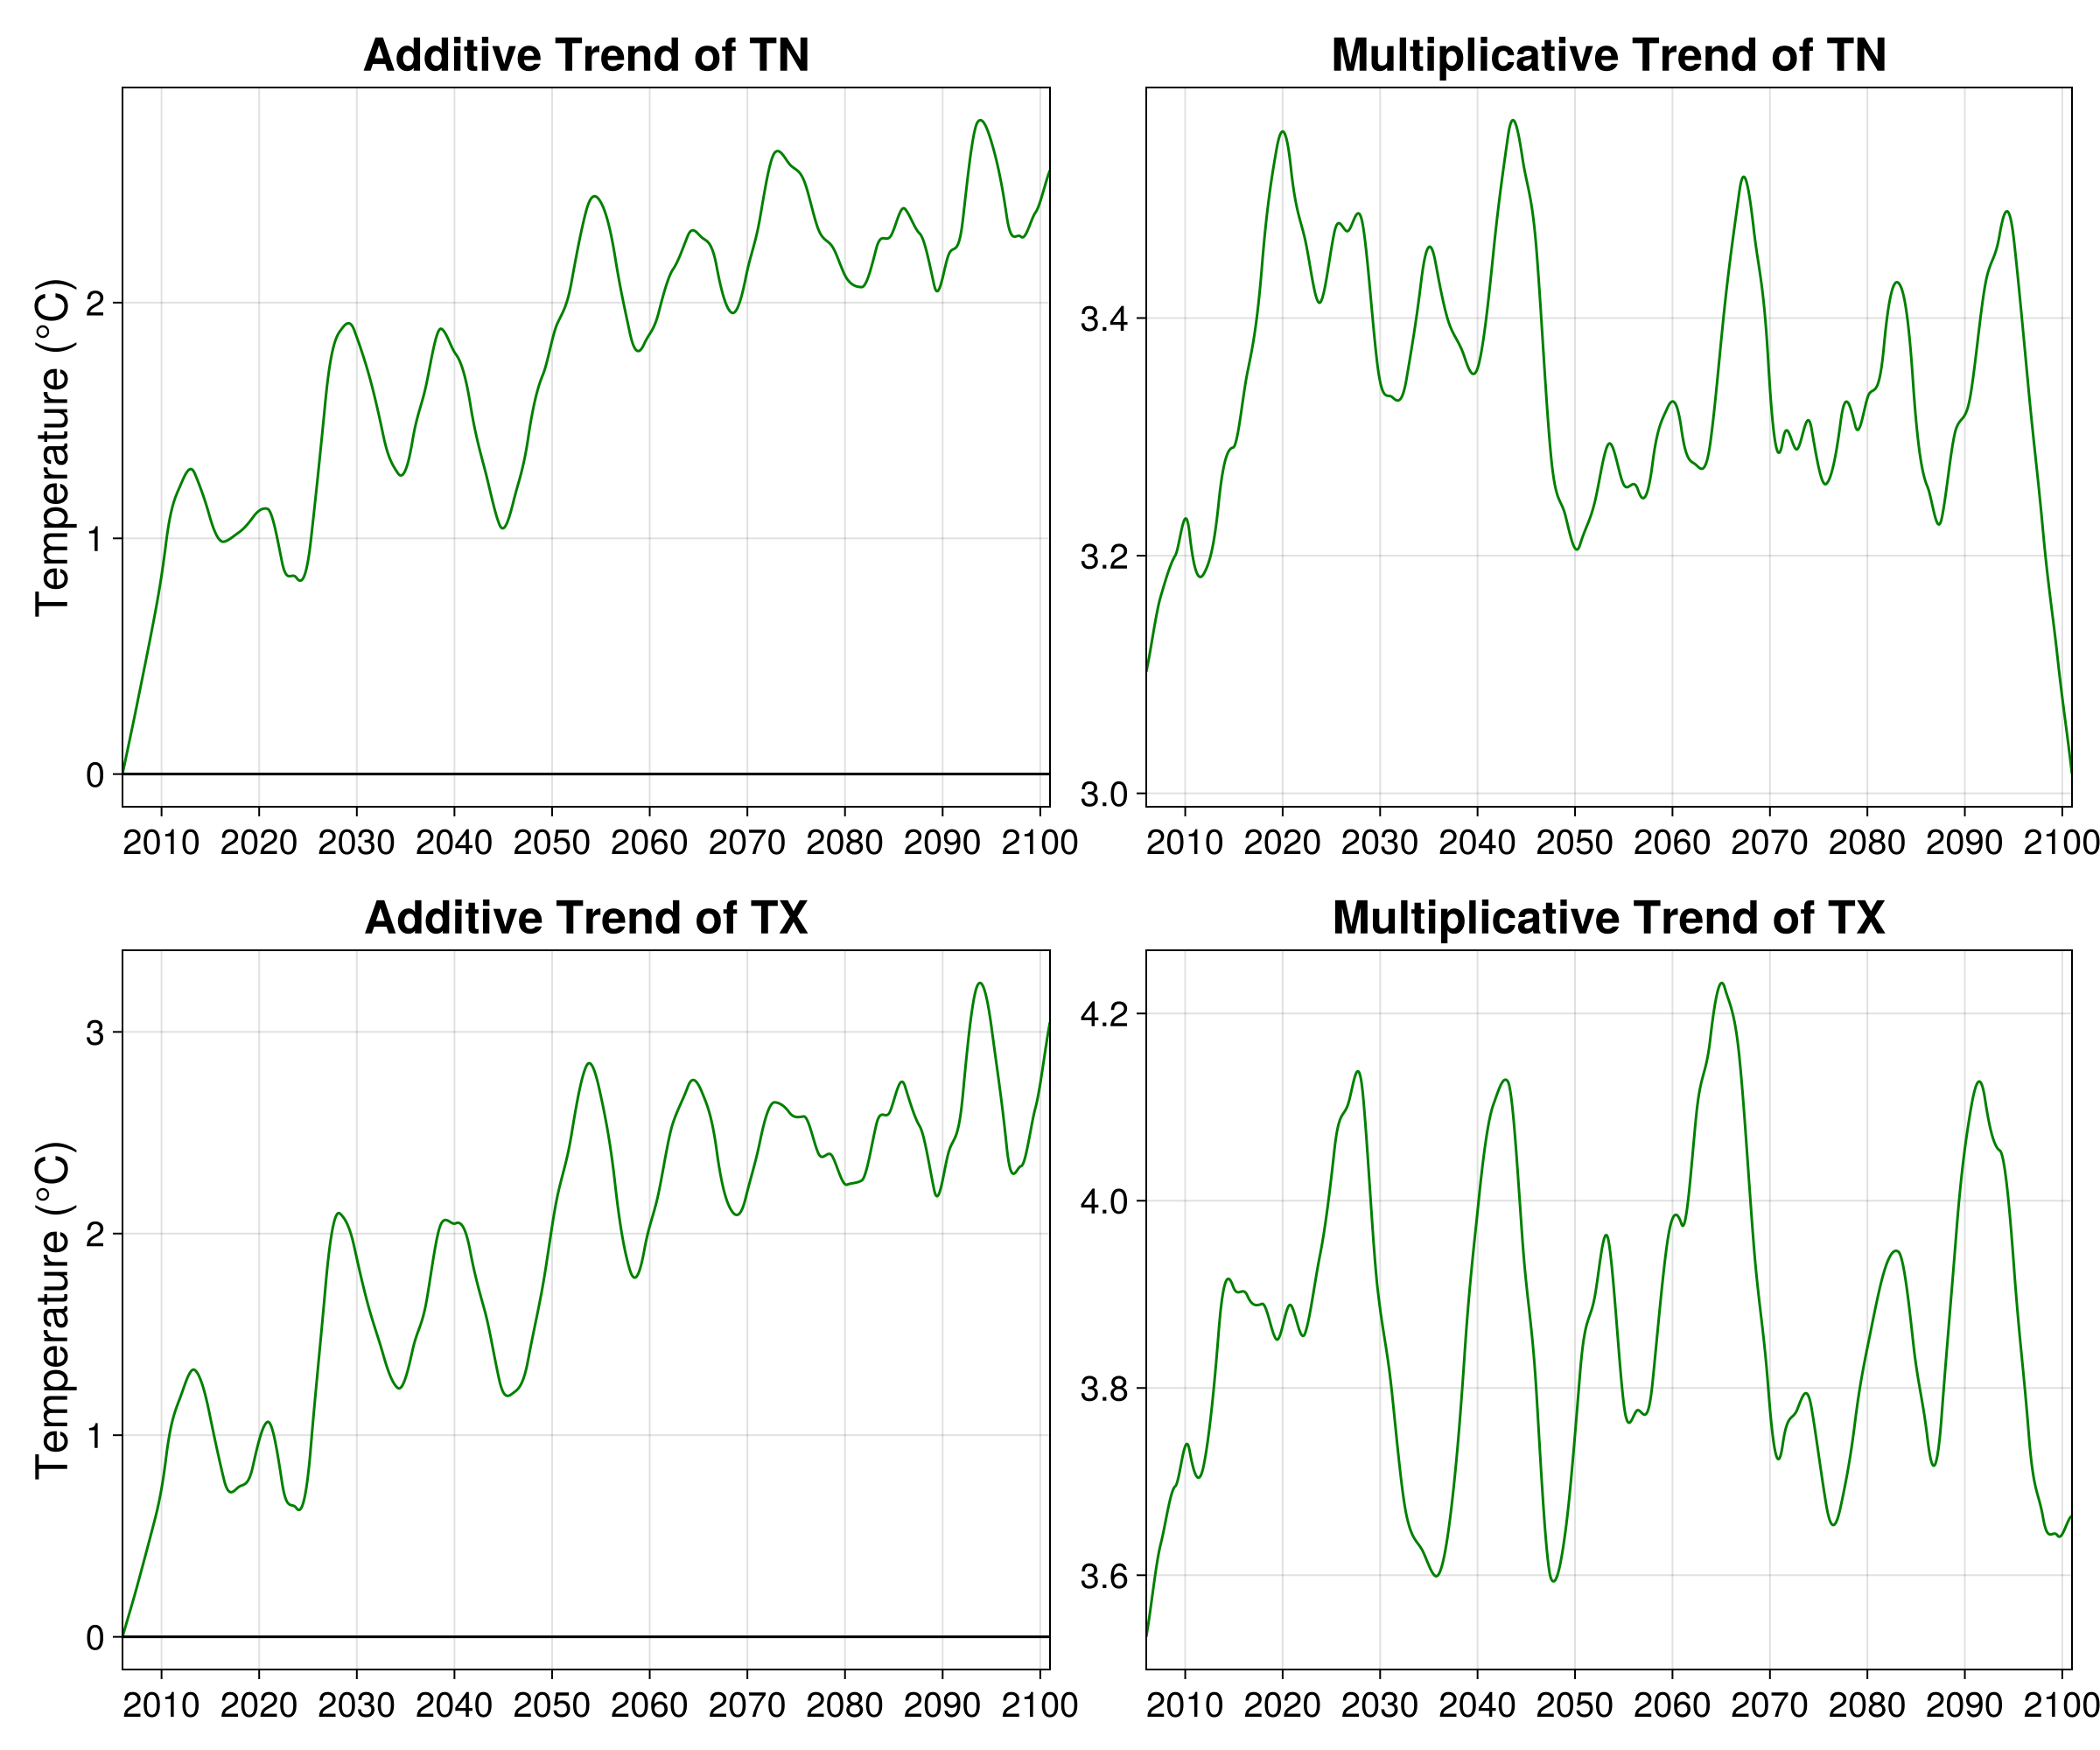

CairoMakie.Screen{IMAGE}


In [26]:
fig = Plot_Freeze_Risk_sample([view(x_hat,:,1) for x_hat in x_vec],date_vec,Set_BB)
display(fig)
save("Presentation/GNantes4_risk.pdf", fig, ; px_per_unit=2.0)
display(PlotTrend(ARmodel))